In [1]:
import pandas as pd
import seaborn as sbs
import numpy as np
import matplotlib.pyplot as plt
import requests
import warnings
import plotly.express as px
import plotly.graph_objects as go

In [2]:
data=  pd.read_csv(r"C:\Users\moham\Desktop\git\IPL cricket Data Analysis\IPL data 2008-2023.csv")

In [3]:
data.head()

,Unnamed: 0,season,id,name,short_name,description,home_team,away_team,toss_won,decision,...,home_playx1,away_playx1,away_key_batsman,away_key_bowler,match_days,umpire1,umpire2,tv_umpire,referee,reserve_umpire
0,4,2023.0,1359544,Royal Challengers Bangalore v Gujarat Titans,RCB v GT,"70th Match (N), Indian Premier League at Benga...",RCB,GT,GT,BOWL FIRST,...,"Virat Kohli (UKN),Faf du Plessis (UKN),Glenn M...","Wriddhiman Saha (WK),Shubman Gill (UKN),Vijay ...","Shubman Gill,Vijay Shankar","Noor Ahmad,Rashid Khan",21 May 2023 - night match (20-over match),Nitin Menon,Virender Sharma,Tapan Sharma,Javagal Srinath,VM Dhokre
1,5,2023.0,1359543,Mumbai Indians v Sunrisers Hyderabad,MI v SRH,"69th Match (D/N), Indian Premier League at Mum...",MI,SRH,MI,BOWL FIRST,...,"Ishan Kishan (WK),Rohit Sharma (UKN),Cameron G...","Vivrant Sharma (AR),Mayank Agarwal (UKN),Heinr...","Mayank Agarwal,Vivrant Sharma","Bhuvneshwar Kumar,Mayank Dagar",21 May 2023 - day/night match (20-over match),KN Ananthapadmanabhan,Rod Tucker,Rohan Pandit,Pankaj Dharmani,Parashar Joshi
2,6,2023.0,1359542,Kolkata Knight Riders v Lucknow Super Giants,KKR v LSG,"68th Match (N), Indian Premier League at Kolka...",KKR,LSG,KKR,BOWL FIRST,...,"Jason Roy (UKN),Venkatesh Iyer (AR),Nitish Ran...","Karan Sharma (AR),Quinton de Kock (WK),Prerak ...","Nicholas Pooran,Quinton de Kock","Ravi Bishnoi,Yash Thakur",20 May 2023 - night match (20-over match),Ulhas Gandhe,Jayaraman Madanagopal,Yeshwant Barde,Manu Nayyar,Mohamed Rafi
3,7,2023.0,1359541,Delhi Capitals v Chennai Super Kings,DC v CSK,"67th Match (D/N), Indian Premier League at Del...",DC,CSK,CSK,BAT FIRST,...,"Prithvi Shaw (UKN),David Warner (UKN),Phil Sal...","Ruturaj Gaikwad (UKN),Devon Conway (UKN),Shiva...","Devon Conway,Ruturaj Gaikwad","Deepak Chahar,Matheesha Pathirana",20 May 2023 - day/night match (20-over match),Chris Gaffaney,Nikhil Patwardhan,Anil Chaudhary,Sanjay Verma,Mohit Krishnadas
4,8,2023.0,1359540,Punjab Kings v Rajasthan Royals,PBKS v RR,"66th Match (N), Indian Premier League at Dhara...",PBKS,RR,RR,BOWL FIRST,...,"Prabhsimran Singh (UKN),Shikhar Dhawan (UKN),A...","Yashasvi Jaiswal (UKN),Jos Buttler (UKN),Devdu...","Devdutt Padikkal,Yashasvi Jaiswal","Navdeep Saini,Adam Zampa",19 May 2023 - night match (20-over match),Nand Kishore,Rod Tucker,Navdeep Singh,Pankaj Dharmani,Parashar Joshi


In [4]:
data.drop(columns=['Unnamed: 0'],inplace= True)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 899 entries, 0 to 898
Data columns (total 43 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   season            899 non-null    float64
 1   id                899 non-null    int64  
 2   name              899 non-null    object 
 3   short_name        899 non-null    object 
 4   description       899 non-null    object 
 5   home_team         899 non-null    object 
 6   away_team         899 non-null    object 
 7   toss_won          899 non-null    object 
 8   decision          899 non-null    object 
 9   1st_inning_score  899 non-null    object 
 10  2nd_inning_score  899 non-null    object 
 11  winner            899 non-null    object 
 12  result            899 non-null    object 
 13  start_date        899 non-null    object 
 14  end_date          899 non-null    object 
 15  venue_id          899 non-null    int64  
 16  venue_name        899 non-null    object 
 1

In [6]:
pd.set_option('display.max_columns', None)

In [7]:
data.head()

,season,id,name,short_name,description,home_team,away_team,toss_won,decision,1st_inning_score,2nd_inning_score,winner,result,start_date,end_date,venue_id,venue_name,home_captain,away_captain,pom,points,super_over,home_overs,home_runs,home_wickets,home_boundaries,away_overs,away_runs,away_wickets,away_boundaries,highlights,home_key_batsman,home_key_bowler,home_playx1,away_playx1,away_key_batsman,away_key_bowler,match_days,umpire1,umpire2,tv_umpire,referee,reserve_umpire
0,2023.0,1359544,Royal Challengers Bangalore v Gujarat Titans,RCB v GT,"70th Match (N), Indian Premier League at Benga...",RCB,GT,GT,BOWL FIRST,197/5,198/4,GT,Titans won by 6 wkts (5b rem),2023-05-21T14:00Z,2023-05-22T23:59Z,57897,"M.Chinnaswamy Stadium, Bengaluru",Faf du Plessis,Hardik Pandya,Shubman Gill,"Gujarat Titans 2, Royal Challengers Bangalore 0",False,20.0,197.0,5.0,28.0,19.1,198.0,4.0,25.0,Gill's second straight century trumps Kohli's ...,"Virat Kohli,Faf du Plessis","Mohammed Siraj,Harshal Patel","Virat Kohli (UKN),Faf du Plessis (UKN),Glenn M...","Wriddhiman Saha (WK),Shubman Gill (UKN),Vijay ...","Shubman Gill,Vijay Shankar","Noor Ahmad,Rashid Khan",21 May 2023 - night match (20-over match),Nitin Menon,Virender Sharma,Tapan Sharma,Javagal Srinath,VM Dhokre
1,2023.0,1359543,Mumbai Indians v Sunrisers Hyderabad,MI v SRH,"69th Match (D/N), Indian Premier League at Mum...",MI,SRH,MI,BOWL FIRST,200/5,201/2,MI,Mumbai won by 8 wkts (12b rem),2023-05-21T10:00Z,2023-05-22T23:59Z,58324,"Wankhede Stadium, Mumbai",Rohit Sharma,Aiden Markram,Cameron Green,"Mumbai Indians 2, Sunrisers Hyderabad 0",False,18.0,201.0,2.0,31.0,20.0,200.0,5.0,27.0,Green century and Madhwal four-for help Mumbai...,"Cameron Green,Rohit Sharma","Akash Madhwal,Chris Jordan","Ishan Kishan (WK),Rohit Sharma (UKN),Cameron G...","Vivrant Sharma (AR),Mayank Agarwal (UKN),Heinr...","Mayank Agarwal,Vivrant Sharma","Bhuvneshwar Kumar,Mayank Dagar",21 May 2023 - day/night match (20-over match),KN Ananthapadmanabhan,Rod Tucker,Rohan Pandit,Pankaj Dharmani,Parashar Joshi
2,2023.0,1359542,Kolkata Knight Riders v Lucknow Super Giants,KKR v LSG,"68th Match (N), Indian Premier League at Kolka...",KKR,LSG,KKR,BOWL FIRST,176/8,175/7,LSG,Super Giants won by 1 run,2023-05-20T14:00Z,2023-05-21T23:59Z,57980,"Eden Gardens, Kolkata",Nitish Rana,Krunal Pandya,Nicholas Pooran,"Lucknow Super Giants 2, Kolkata Knight Riders 0",False,20.0,175.0,7.0,24.0,20.0,176.0,8.0,22.0,"Pooran, Bishnoi seal Lucknow Super Giants' pla...","Rinku Singh,Jason Roy","Sunil Narine,Shardul Thakur","Jason Roy (UKN),Venkatesh Iyer (AR),Nitish Ran...","Karan Sharma (AR),Quinton de Kock (WK),Prerak ...","Nicholas Pooran,Quinton de Kock","Ravi Bishnoi,Yash Thakur",20 May 2023 - night match (20-over match),Ulhas Gandhe,Jayaraman Madanagopal,Yeshwant Barde,Manu Nayyar,Mohamed Rafi
3,2023.0,1359541,Delhi Capitals v Chennai Super Kings,DC v CSK,"67th Match (D/N), Indian Premier League at Del...",DC,CSK,CSK,BAT FIRST,223/3,146/9,CSK,Super Kings won by 77 runs,2023-05-20T10:00Z,2023-05-21T23:59Z,58040,"Arun Jaitley Stadium, Delhi",David Warner,MS Dhoni,Ruturaj Gaikwad,"Chennai Super Kings 2, Delhi Capitals 0",False,20.0,146.0,9.0,17.0,20.0,223.0,3.0,31.0,"Gaikwad, Conway script CSK's big win. For Delh...","David Warner,Axar Patel","Chetan Sakariya,Anrich Nortje","Prithvi Shaw (UKN),David Warner (UKN),Phil Sal...","Ruturaj Gaikwad (UKN),Devon Conway (UKN),Shiva...","Devon Conway,Ruturaj Gaikwad","Deepak Chahar,Matheesha Pathirana",20 May 2023 - day/night match (20-over match),Chris Gaffaney,Nikhil Patwardhan,Anil Chaudhary,Sanjay Verma,Mohit Krishnadas
4,2023.0,1359540,Punjab Kings v Rajasthan Royals,PBKS v RR,"66th Match (N), Indian Premier League at Dhara...",PBKS,RR,RR,BOWL FIRST,187/5,189/6,RR,Royals won by 4 wkts (2b rem),2023-05-19T14:00Z,2023-05-20T23:59Z,58056,"Himachal Pradesh Cricket Association Stadium, ...",Shikhar Dhawan,Sanju Samson,Devdutt Padikkal,"Rajasthan Royals 2, Punjab Kings 0",False,20.0,187.0,5.0,26.0,19.4,189.0,6.0,27.0,"P

## Toss Ratio

In [8]:
c = data['decision'].value_counts()

In [9]:
fig = px.bar(c, x=c.index, y=c.values, labels={'x': 'Decision', 'y': 'Count'})
fig.update_layout(title='Count of Decisions')
fig.show()


## How many teams won the toss

In [10]:
toss = data['toss_won'].value_counts()

In [11]:
data['toss_won'].nunique()

15

In [12]:
fig = px.pie(names=toss.index, values=toss.values, title='Pie Chart of Decisions')

fig.show()

## Droping some more column.

In [13]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
season,899.0,2015.729700,4.596323,2008.0,2012.0,2015.0,2020.0,2023.0
id,899.0,878206.164627,350142.842656,335982.0,548326.5,829815.0,1216509.5,1359544.0
venue_id,899.0,126636.385984,166074.196459,57851.0,57991.0,58150.0,59093.5,1070094.0
home_overs,899.0,19.116240,2.008041,4.5,19.2,20.0,20.0,20.0
home_runs,899.0,158.746385,31.665220,58.0,138.5,160.0,180.0,263.0
home_wickets,899.0,5.751947,2.390051,0.0,4.0,6.0,8.0,10.0
home_boundaries,899.0,19.484983,5.903506,3.0,15.0,19.0,24.0,42.0
away_overs,899.0,19.086318,2.072742,4.2,19.2,20.0,20.0,20.0
away_runs,899.0,155.814238,31.238539,44.0,136.0,158.0,176.0,257.0
away_wickets,899.0,5.905451,2.511657,0.0,4.0,6.0,8.0,10.0


 ## How many times a team win.

In [14]:
winner = data['winner'].value_counts()

In [15]:
data['winner'].nunique()

15

In [16]:
fig = px.pie(names=winner.index, values=winner.values, title='Pie Chart of Winners in the Match')
fig.show()

## How many times does the player gets the Player of the match title.

In [17]:
pom=data['pom'].value_counts().head(20)

In [18]:
data['pom'].nunique()

265

In [19]:
fig = px.bar(pom, y=pom.index, x=pom.values, orientation='h', 
             labels={'x': 'Count', 'y': 'Player of the Match'}, title='Top 20 Player of the Match Winners')
fig.show()

In [20]:
ump1 = data['umpire1'].value_counts()

In [21]:
data['umpire1'].nunique()

62

In [22]:
ump2 = data['umpire2'].value_counts()

In [23]:
data['umpire2'].nunique()

64

In [24]:
tvunp = data['tv_umpire'].value_counts()

In [25]:
data['tv_umpire'].nunique()

68

## Umpire 

In [26]:
fig = px.bar(ump1, y=ump1.index, x=ump1.values, orientation='h', 
             labels={'x': 'Count', 'y': 'Umpire of the Match'}, title='Top frequent Umpire')
fig.show()

In [27]:
fig = px.bar(ump2, y=ump2.index, x=ump2.values, orientation='h', 
             labels={'x': 'Count', 'y': 'Umpire of the Match'}, title='Top frequent Umpire')
fig.show()

## Tv_umpire

In [28]:
fig = px.bar(tvunp, y=tvunp.index, x=tvunp.values, orientation='h', 
             labels={'x': 'Count', 'y': 'Umpire of the Match'}, title=' Top frequent TVUmpire in the Matches')
fig.show()

## Matches played on which ground?

In [29]:
match = data['venue_name'].value_counts()

In [30]:
data['venue_name'].nunique()

37

In [31]:
fig = px.bar(match, y=match.index, x=match.values, orientation='h', 
             labels={'x': 'Count', 'y': 'Venue of the Matches'}, title=' Most played Matches ')
fig.show()

## Super Over

In [32]:
sup = data['super_over'].value_counts()

In [33]:
fig = px.pie(names=sup.index, values=sup.values, title='Pie Chart of Super Overs in the Match')
fig.show()

## Some in depth analysis using relational plots

c:\Users\moham\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning:

The figure layout has changed to tight



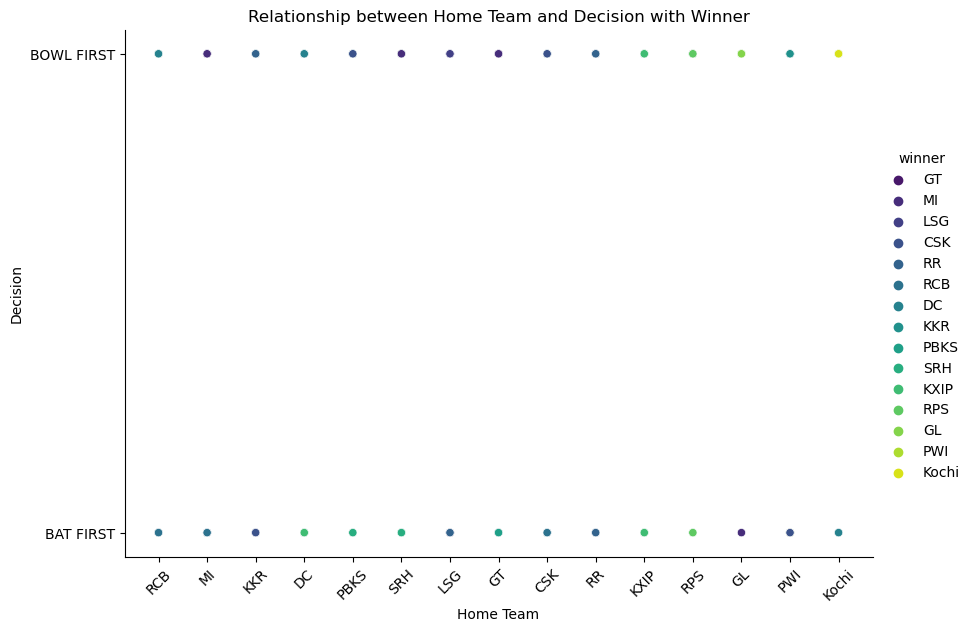

In [34]:
sbs.relplot(x="home_team", y="decision", hue="winner", data=data, palette="viridis", height=6, aspect=1.5)
plt.title('Relationship between Home Team and Decision with Winner')
plt.xlabel('Home Team')
plt.ylabel('Decision')
plt.xticks(rotation=45)  
plt.show()

c:\Users\moham\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning:

The figure layout has changed to tight



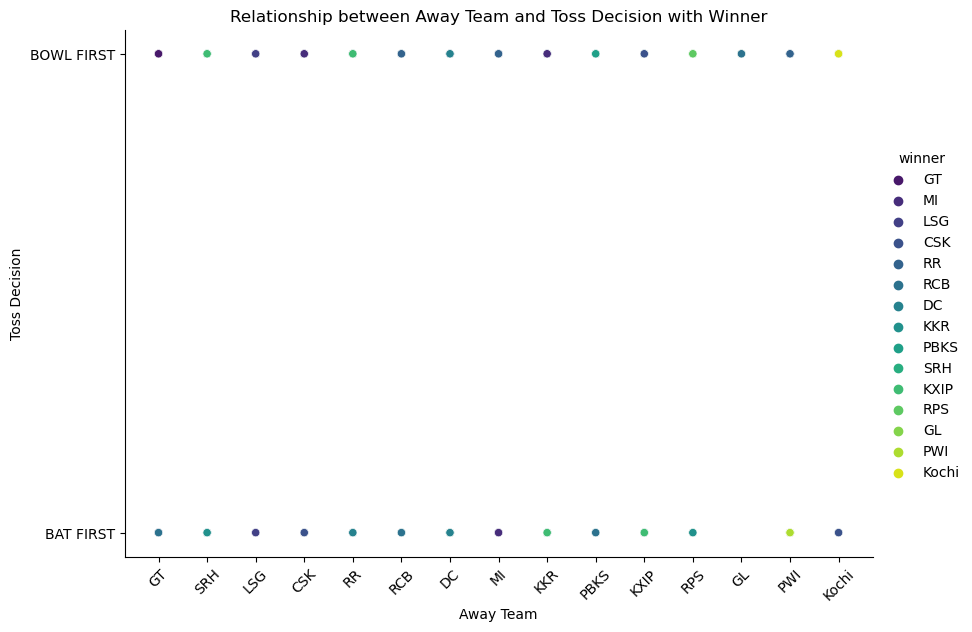

In [35]:
sbs.relplot(x="away_team", y="decision", hue="winner", data=data, palette="viridis", height=6, aspect=1.5)
plt.title('Relationship between Away Team and Toss Decision with Winner')
plt.xlabel('Away Team')
plt.ylabel('Toss Decision')
plt.xticks(rotation=45)  
plt.show()

## Heatmap

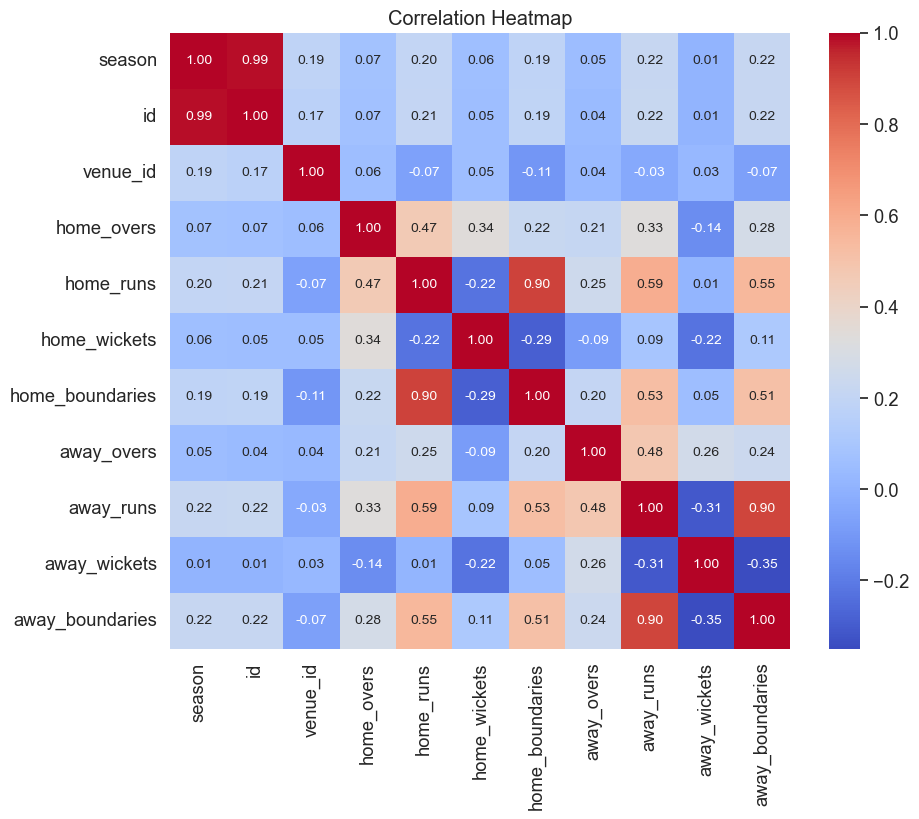

In [36]:
warnings.filterwarnings("ignore", category=DeprecationWarning)
sbs.set(font_scale=1.2)  # Adjust font size if needed
plt.figure(figsize=(10, 8))  # Adjust figure size if needed
numerical_data = data.select_dtypes(include=['float64', 'int64'])
corr_matrix = numerical_data.corr()
sbs.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10})
plt.title('Correlation Heatmap')
plt.show()


## Scatter plot using plotly and seaborn.

In [37]:
fig = px.scatter_3d(data, x='home_wickets', y='away_wickets', z='season', color='winner')
fig.update_layout(scene=dict(xaxis_title='Home Wickets', yaxis_title='Away Wickets', zaxis_title='Winner'))
fig.show()
